<a href="https://colab.research.google.com/github/dec4der/Cancer-Predictor/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [83]:
path = '/content/cancer.csv'
df = pd.read_csv(path)
df.head(6)

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
5,1,8,10,10,8,7,10,9,7,1


In [84]:
df.describe()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [85]:
pd.unique(df.Class)

array([0, 1])

In [86]:
df.isnull().sum()

Class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64

Plotting Scatterplots for the dataset

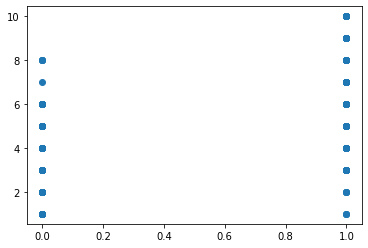

In [87]:
plt.scatter(df['Class'], df['age'])

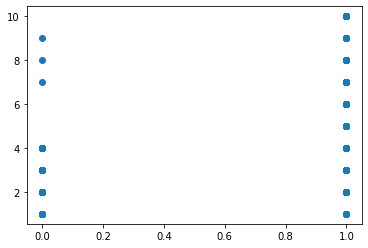

In [88]:
plt.scatter(df['Class'], df['menopause'])

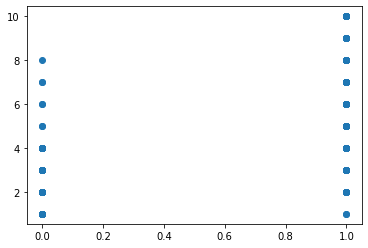

In [89]:
plt.scatter(df['Class'], df['tumor_size'])

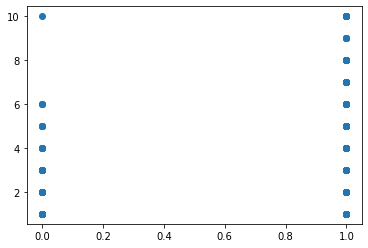

In [90]:
plt.scatter(df['Class'], df['inv_nodes'])

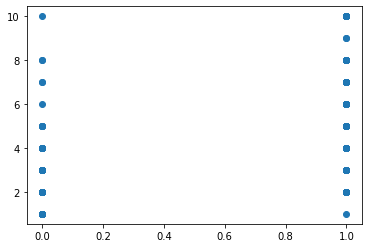

In [91]:
plt.scatter(df['Class'], df['node_caps'])

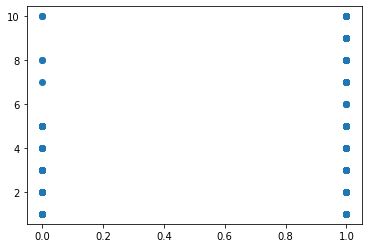

In [92]:
plt.scatter(df['Class'], df['deg_malig'])

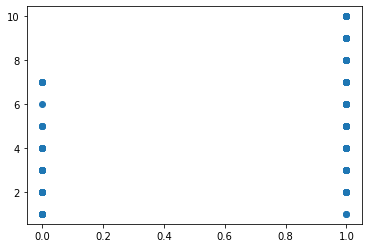

In [93]:
plt.scatter(df['Class'], df['breast'])

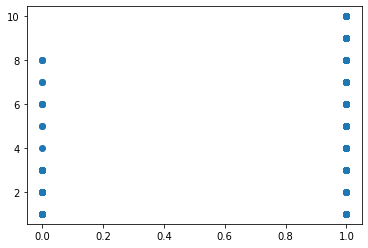

In [94]:
plt.scatter(df['Class'], df['breast_quad'])

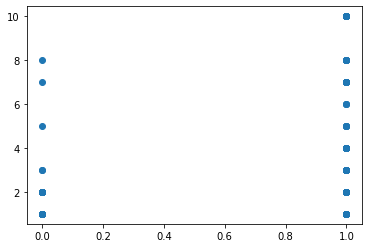

In [95]:
plt.scatter(df['Class'], df['irradiat'])

Plotting bar graphs for the dataset

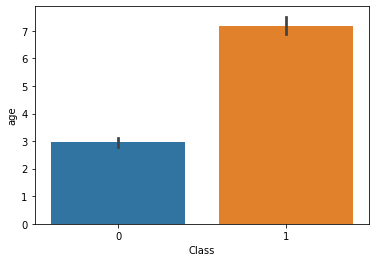

In [96]:
import seaborn as snb
snb.barplot(x='Class',y = 'age', data=df)
plt.show()

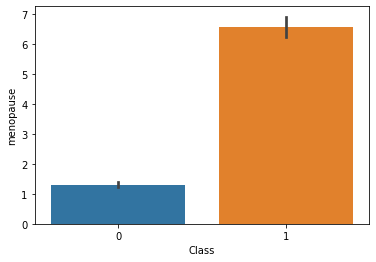

In [97]:
snb.barplot(x='Class',y = 'menopause', data=df)
plt.show()

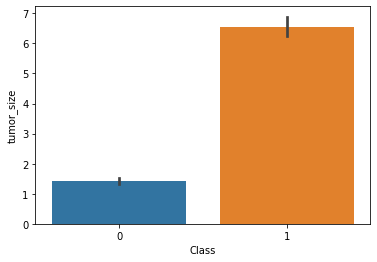

In [98]:
snb.barplot(x='Class',y = 'tumor_size', data=df)
plt.show()

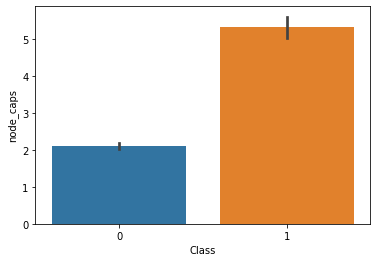

In [99]:
snb.barplot(x='Class',y = 'node_caps', data=df)
plt.show()

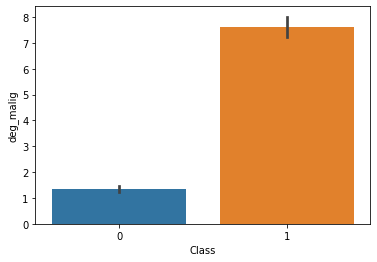

In [100]:
snb.barplot(x='Class',y = 'deg_malig', data=df)
plt.show()

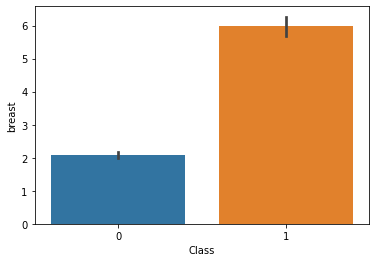

In [101]:
snb.barplot(x='Class',y = 'breast', data=df)
plt.show()

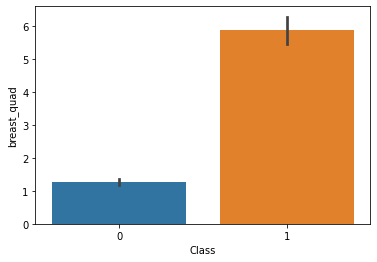

In [102]:
snb.barplot(x='Class',y = 'breast_quad', data=df)
plt.show()

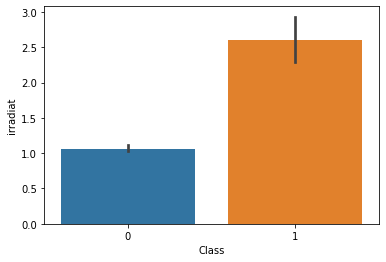

In [103]:
snb.barplot(x='Class',y = 'irradiat', data=df)
plt.show()

Defining X

In [104]:
X = df[['age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']]
X.head(10)

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


defining Y

In [105]:
Y = df[['Class']]
Y.head(10)

,Class
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


Splitting the dataset into training set and test set

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [107]:
len(X_train)

478

In [108]:
len(Y_train)

478

In [109]:
len(X_test)

205

In [110]:
len(Y_test)

205

In [111]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)

In [112]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [113]:
model.score(X_test, Y_test)

0.9707317073170731

In [114]:
model.score(X_train, Y_train)

0.9811715481171548

In [116]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1])

In [117]:
model.predict([['5','1','1','1','2','1','3','1','1']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([0])

In [119]:
model.predict([['8','10','10','8','7','10','9','7','1']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([1])